This code is exploring the construction of a bimodal (two-Gaussian) pdf

In [34]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import scipy.interpolate as scpy
import scipy.optimize as optimization

In [35]:
# Local imports
import sys
sys.path.append('../')
import statstuff as sts
from statstuff import pWeibull, sigma2meanr

In [36]:
# Graphics
%matplotlib notebook

<IPython.core.display.Javascript object>


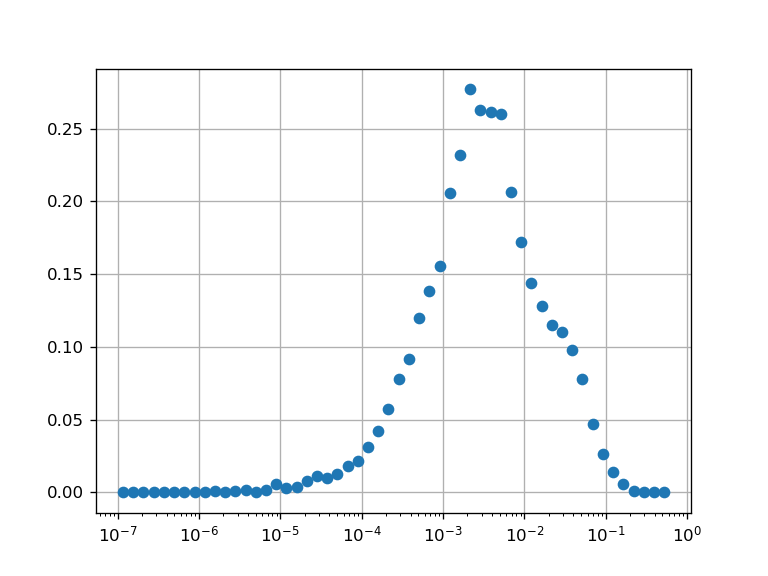

0.9999999999999998


In [37]:
#TRYING THE BIMODAL FIT WITH A WEIGHTED VARIABLE
#practice to fitting points to a Weibull function
# r = np.geomspace(1e-6,.99,40)
# pdf1 = pWeibull(r,0.2,1.0)*r
# pdf2 = pWeibull(r,0.7,1.0)*r
# N= 0.8
# y = (1-N)*pdf1+pdf2*N

dummy= np.loadtxt('roughness.txt')
r= dummy[0,:]
y= dummy[1,:]

#Do you want to save the bimodal fit created?
Iwanttosave = True

#plot scattered points
plt.figure()
plt.semilogx(r,y,'o')
plt.grid(True)

#check for normalization 
norm = -np.trapz(np.log(r),y); print(norm)

In [38]:
def func(r, sigma1, sigma2, N):
    pdf1 = pWeibull(r,sigma1,1.0)*r
    pdf2 = pWeibull(r,sigma2,1.0)*r
    return (1-N)*pdf1 + N*pdf2 

In [39]:
x0 = np.array([0.5,0.8, 0.1])
solution, solutionerror = optimization.curve_fit(func, r, y, x0)
best_sigma1 = solution[0]; print('best sigma1 =',best_sigma1)
best_sigma2 = solution[1]; print('best sigma2 =',best_sigma2)
best_N = solution[2]; print(best_N)

best sigma1 = 0.0744898835755891
best sigma2 = 0.21947405833214628
0.32659767756454733


<IPython.core.display.Javascript object>


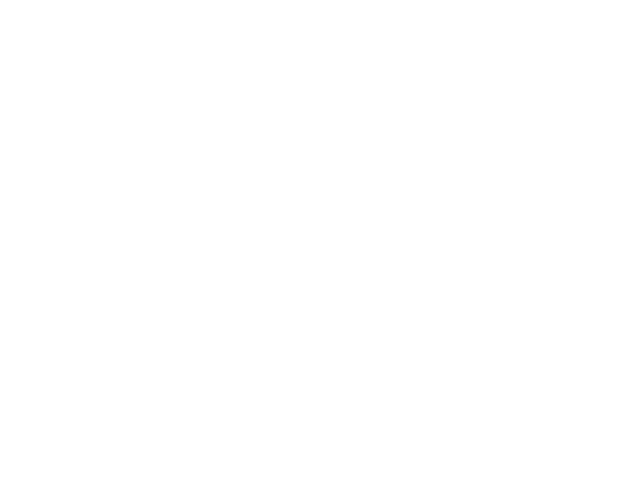

In [40]:
# Testing our found sigma value with an eta of 1.0
plt.figure()
plt.semilogx(r,y,'o',label='Obs')
plt.semilogx(r,func(r, best_sigma1, best_sigma2, best_N), label='Fit')
plt.legend()

In [43]:
print('best sigma1 =',best_sigma1)
print('best sigma2 =',best_sigma2)
best_zsquar1= best_sigma1**2
best_zsquar2= best_sigma2**2
r1 = sigma2meanr(best_sigma1); print("r1 ",r1)
r2 = sigma2meanr(best_sigma2); print("r2 ",r2)
cost1=1-r1
cost2=1-r2
t1=np.arccos(cost1)*180/np.pi; print("t1", t1)
t2=np.arccos(cost2)*180/np.pi; print('t2', t2)

best sigma1 = 0.0744898835755891
best sigma2 = 0.21947405833214628
r1  0.0027515336184271858
r2  0.022524581666190566
t1 4.2513285916471375
t2 12.183850919226828


In [44]:
#Update with file name of the crystal
if Iwanttosave:
    plt.savefig('bimodalfit.png')   # save the figure to file
    plt.close() 
    cfile = open('bimodalfit.txt','w')
    cfile.write('&Bimodal_fit\n')
    cfile.write('2016-06-30-ice1 Case1.2.1')
    cfile.write('   '+'sigma1 =' +str(best_sigma1)+'\n')
    cfile.write('   '+'sigma2 =' +str(best_sigma2)+'\n')
    cfile.write('   '+'weight(N) =' +str(best_N)+'\n')
    cfile.write('   '+'theta1 =' +str(t1)+'\n')
    cfile.write('   '+'theta2 =' +str(t2)+'\n')